# MD maps without csf (threshold 0.5) with amyloid staging


In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import os.path as osp
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


180131-14:01:15,502 interface WARNING:
	 Could not get linked libraries for "which".


In [2]:
excel_fp = '/home/grg/SPM/2018/amylnegative_MD_wo_csf5.xls'

analysis_name, ext = osp.splitext(osp.split(excel_fp)[1])
paramtype = analysis_name.split('_')[1]
analysis_wd = osp.join(osp.dirname(excel_fp), analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
#aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/SPM/MNI_T1_brain_wo_csf.nii'
print 'Found SPM files:', spm
pd.read_excel(excel_fp).head()

Found SPM files: ['/home/grg/SPM/2018/amylnegative_MD_wo_csf5/estimatecontrasts/SPM.mat']


,images,age,gender,NC,HT,HO
0,/home/grg/data/AmylStaging/dartel_final/spm/MD...,63.422313,2,1,0,0
1,/home/grg/data/AmylStaging/dartel_final/spm/MD...,54.757016,1,1,0,0
2,/home/grg/data/AmylStaging/dartel_final/spm/MD...,50.390144,2,0,0,1
3,/home/grg/data/AmylStaging/dartel_final/spm/MD...,54.151951,1,1,0,0
4,/home/grg/data/AmylStaging/dartel_final/spm/MD...,52.878850,1,1,0,0


In [3]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/SPM/2018/amylnegative_MD_wo_csf5.xls looking up column MD ...
Analysis name: amylnegative_MD_wo_csf5
First column: images
Columns in the model: [u'age', u'gender', u'NC', u'HT', u'HO']
Non-carriers / Heterozygotes / Homozygotes detected
Effect of Gender
Effect of Linear age
Analysis name: amylnegative_MD_wo_csf5
Scans (82): [u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10019_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10044_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10065_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10070_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10137_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10200_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10225_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10235_MD_wo_csf_s.nii',

,contrast name,contrast type,covariate names,covariate weights
0,HO>HT,T,"[HO, HT]","[1.0, -1.0]"
1,HO>NC,T,"[HO, NC]","[1.0, -1.0]"
2,HT>NC,T,"[HT, NC]","[1.0, -1.0]"
3,Effect Gender,T,[gender],[1.0]
4,Effect Linear age,T,[age],[1.0]


/home/grg/SPM/2018/amylnegative_MD_wo_csf5/estimatecontrasts/spmT_0001.nii T


/home/grg/jupyter/local/lib/python2.7/site-packages/nilearn/plotting/displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


Saving to... /tmp/tmpR5BwJv.png
/home/grg/SPM/2018/amylnegative_MD_wo_csf5/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpNpgctl.png
/home/grg/SPM/2018/amylnegative_MD_wo_csf5/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpIjMjyd.png
/home/grg/SPM/2018/amylnegative_MD_wo_csf5/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmpiYpfBC.png
/home/grg/SPM/2018/amylnegative_MD_wo_csf5/estimatecontrasts/spmT_0005.nii T
Saving to... /tmp/tmpVYrXQf.png


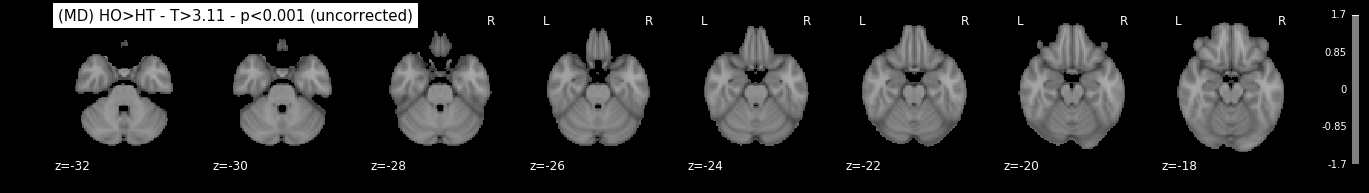

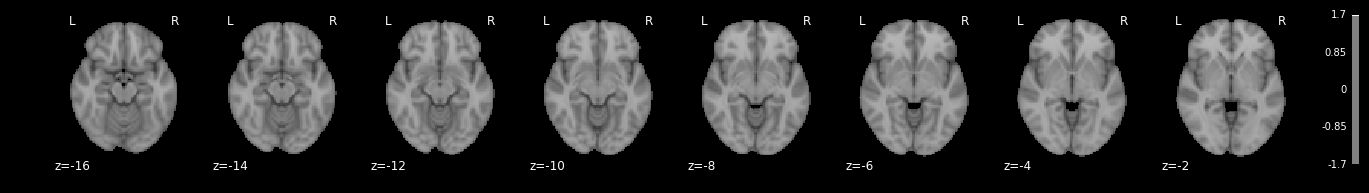

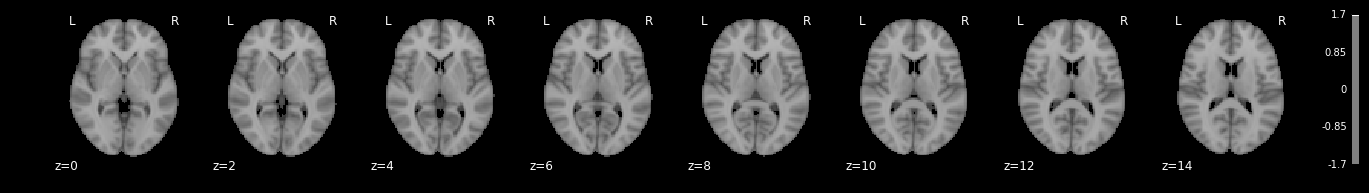

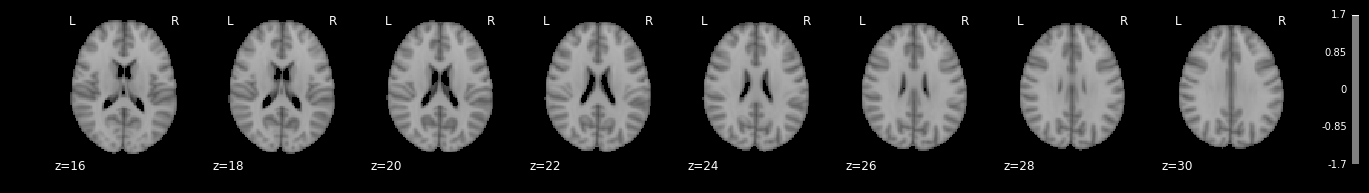

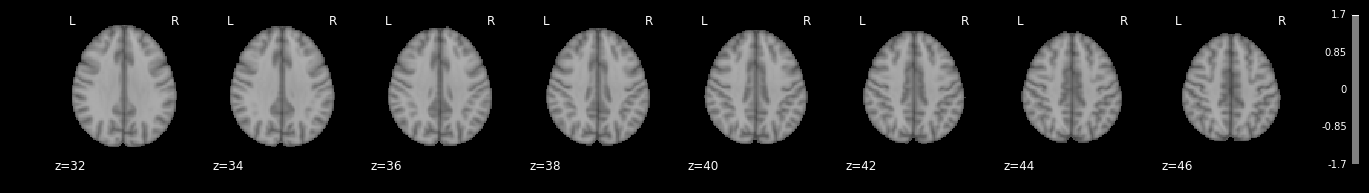

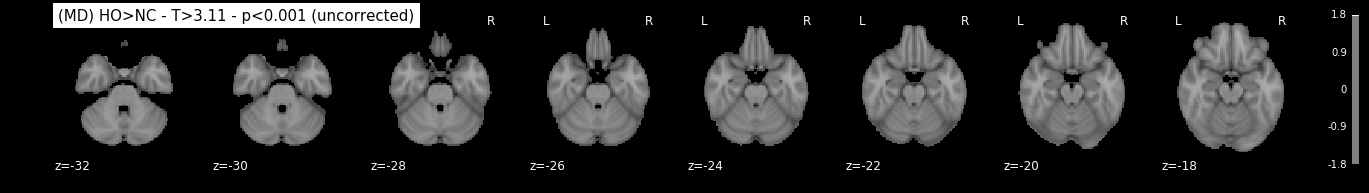

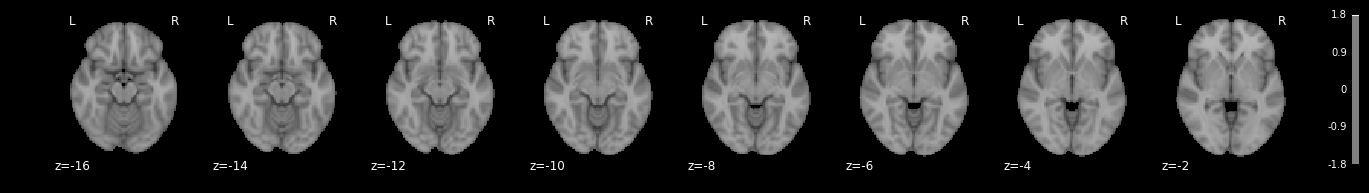

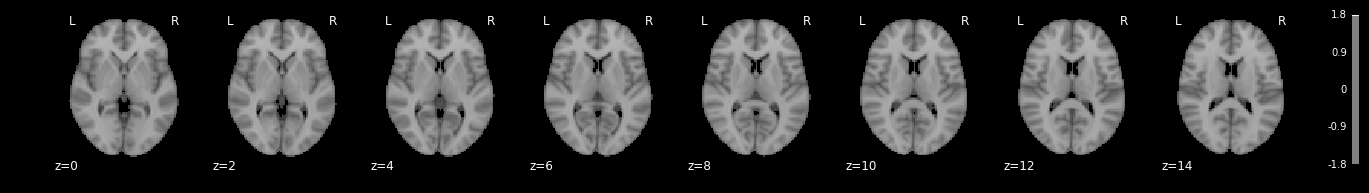

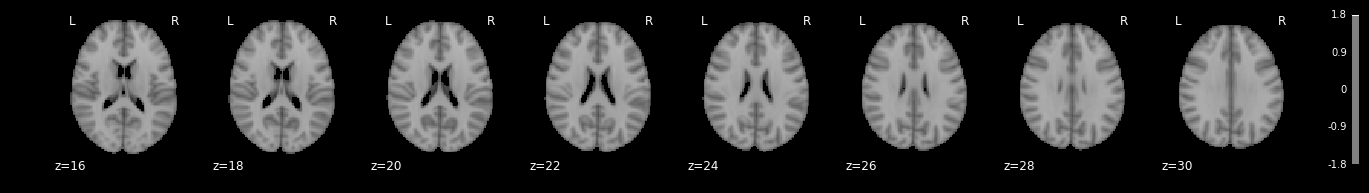

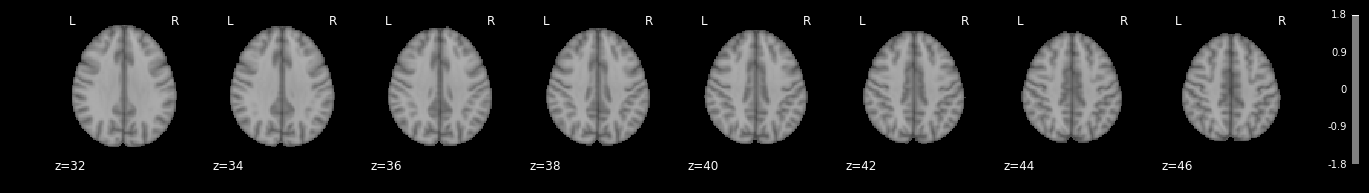

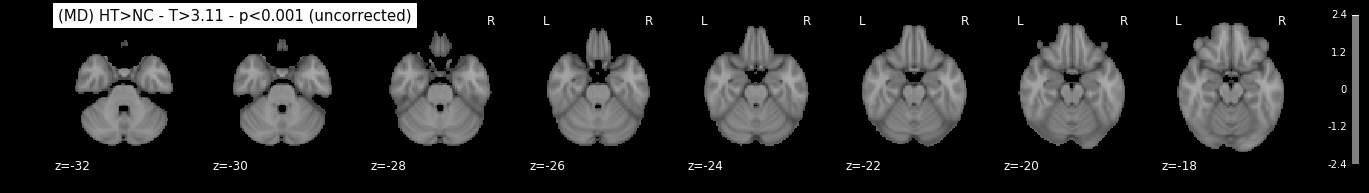

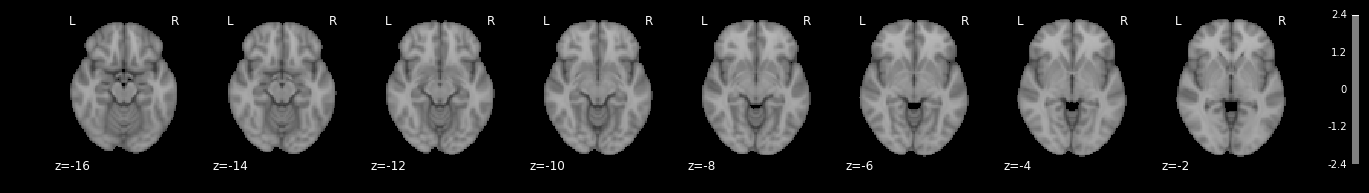

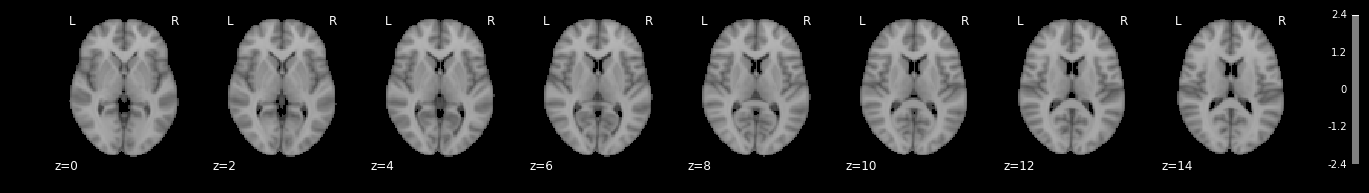

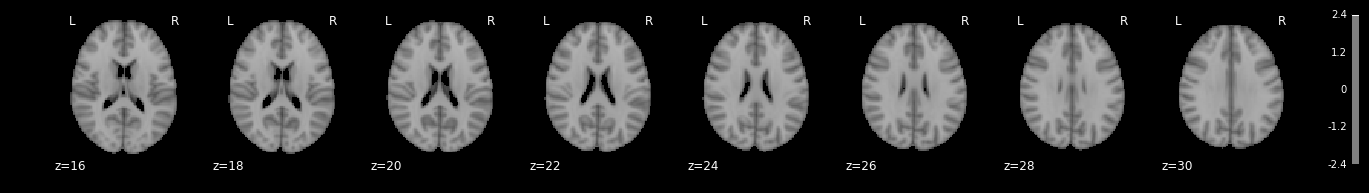

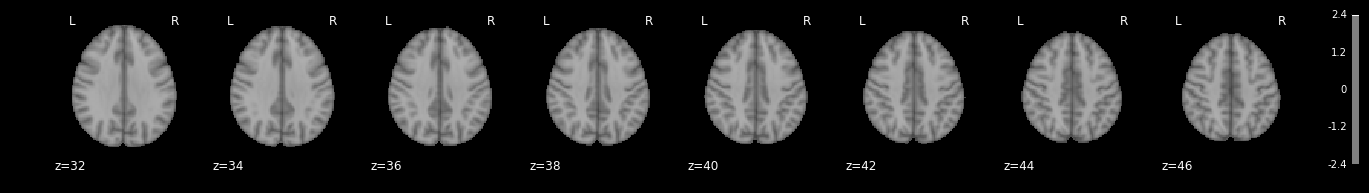

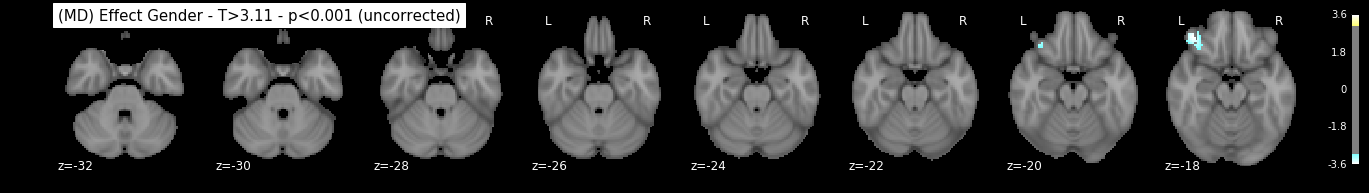

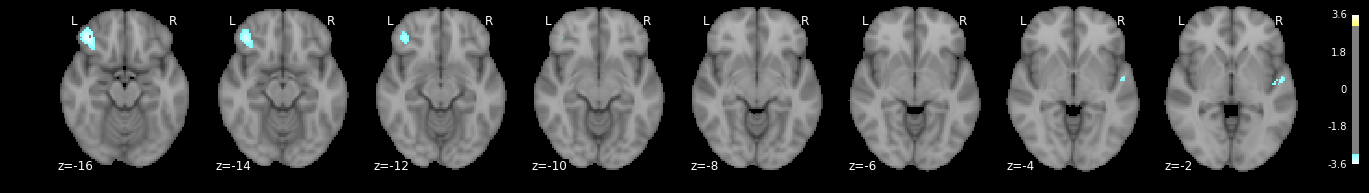

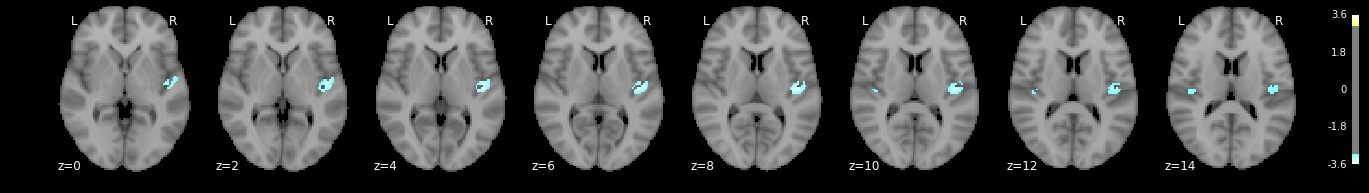

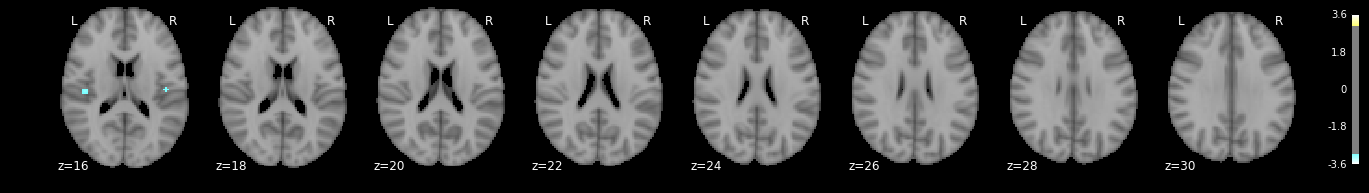

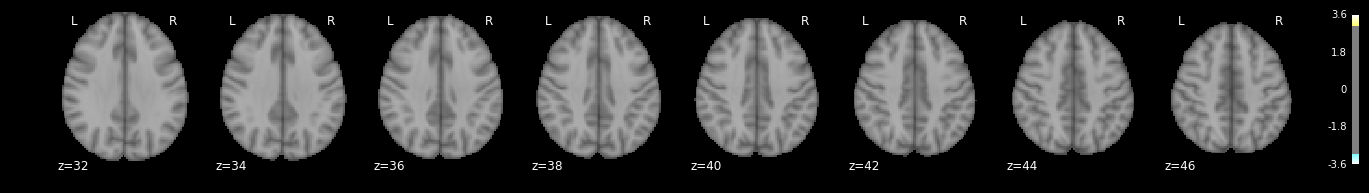

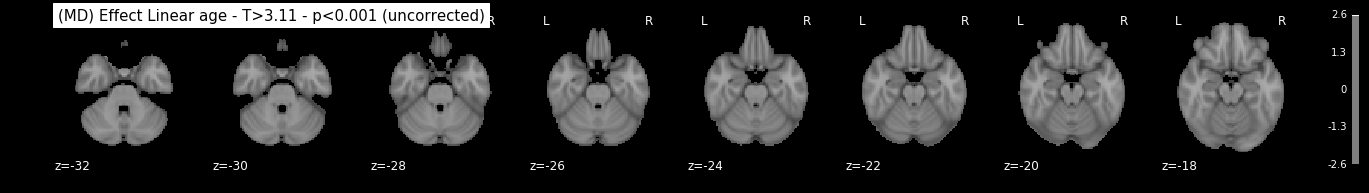

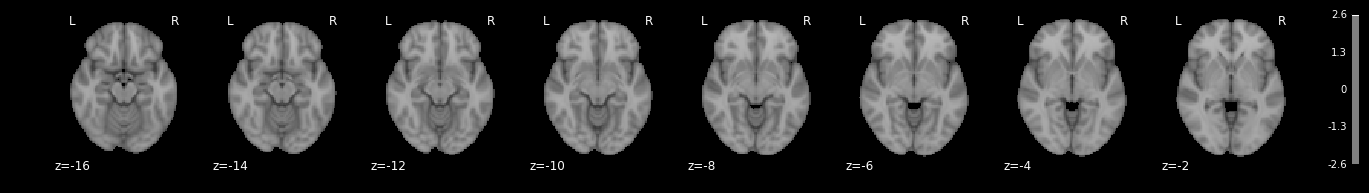

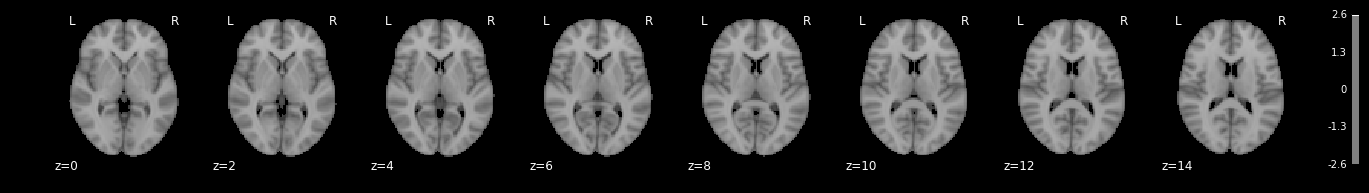

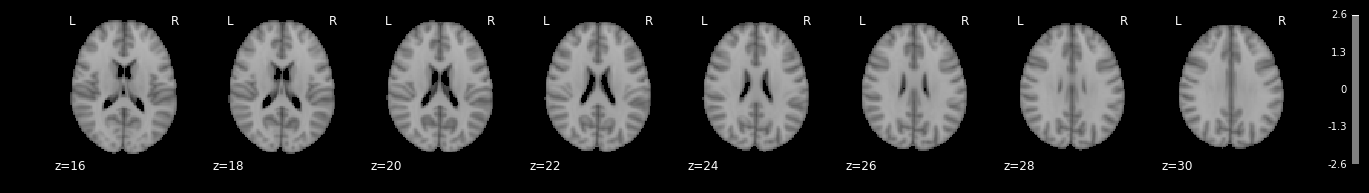

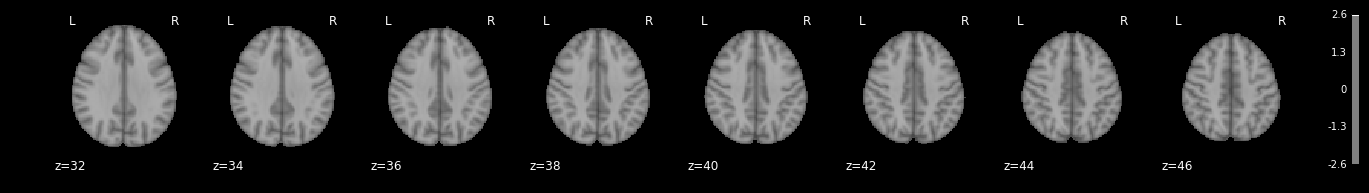

In [4]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', mode='uncorrected')

In [19]:
spm_mat_file = spm[0]
print spm_mat_file
out = pyAAL.pyAAL(spm_mat_file, 2, k=10, mode=2)
pyAAL.to_dataframe(out)

/home/grg/SPM/2018/amylnegative_MDwocsf/estimatecontrasts/SPM.mat
creating tempfile /tmp/tmpSkWHPC.m
matlab -nodisplay -nodesktop -nosplash -nojvm -r "addpath('/home/grg/SPM/2018/amylnegative_MDwocsf/estimatecontrasts');run('/tmp/tmpSkWHPC');quit"

Contrast: HO>NC


IndexError: list index out of range